In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [218]:
df = pd.read_csv('dataframe/champions.csv')  
df.head(5)  

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [219]:
df['GolesTotales'] = df['GolesLocal'] + df['GolesVisitante']


In [220]:
# Eliminar la columna 'Temporada' y 'Ronda' ya que son categóricas y no se pueden convertir directamente a flotante
df = df.drop(columns=['Temporada', 'Ronda', 'Evento', 'GolesLocal', 'GolesVisitante'])
df.head(5)

,idPartido,Local,Visitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,%_Victoria_Visitante,%_Equipo1_Ganado,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,GolesTotales
0,121,235,11,1,0,0,100.0,0.0,0.0,0.0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,1
1,122,14,153,1,0,0,0.0,100.0,0.0,0.0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,3
2,123,15,1,0,0,1,100.0,0.0,0.0,0.0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,3
3,124,10,298,1,0,0,0.0,0.0,100.0,100.0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,2
4,125,184,2,0,1,0,100.0,0.0,0.0,0.0,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,2


In [221]:
df.columns

Index(['idPartido', 'Local', 'Visitante', 'VictoriaLocal', 'Empate',
       'VictoriaVisitante', '%_Victorias_Local', '%_Empate',
       '%_Victoria_Visitante', '%_Equipo1_Ganado', '%_Equipo2_Ganado',
       '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L',
       '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP',
       '1_ValorJugadores', '1_MediaJugadores', '%_2_G_Temporada',
       '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L',
       '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores',
       '2_MediaJugadores', 'GolesTotales'],
      dtype='object')

In [222]:
numeric_features = ['%_Victorias_Local', '%_Empate', '%_Victoria_Visitante',
                    '%_Equipo1_Ganado', '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L',
                    '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores',
                    '%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L',
                    '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']

stats = df[numeric_features].describe()
print(stats)

       %_Victorias_Local     %_Empate  %_Victoria_Visitante  %_Equipo1_Ganado  \
count        2494.000000  2494.000000           2494.000000       2494.000000   
mean           47.165525    22.599098             29.994138         33.272702   
std            39.854567    33.955463             37.239308         39.001479   
min             0.000000     0.000000              0.000000          0.000000   
25%             0.000000     0.000000              0.000000          0.000000   
50%            42.860000     0.000000             14.290000         20.000000   
75%           100.000000    33.330000             42.860000         66.670000   
max           100.000000   100.000000            100.000000        100.000000   

       %_Equipo2_Ganado  %_1_G_Temporada  %_1_G_Temporada_L  \
count       2494.000000      2494.000000        2494.000000   
mean          43.887017        37.576776          47.554166   
std           41.499846        22.245564          31.825457   
min            0.0

En promedio, se marcan más goles en casa (1.61 goles) que fuera (1.20 goles). Sin embargo, la diferencia no es significativa. El porcentaje promedio de victorias en casa es del 47.55%, mientras que el porcentaje promedio de victorias como visitante es del 30.07%. Esto sugiere que los equipos tienen una ligera ventaja al jugar en casa. El porcentaje promedio de empates es del 22.37%. Esto indica que aproximadamente una de cada cinco partidos termina en empate.

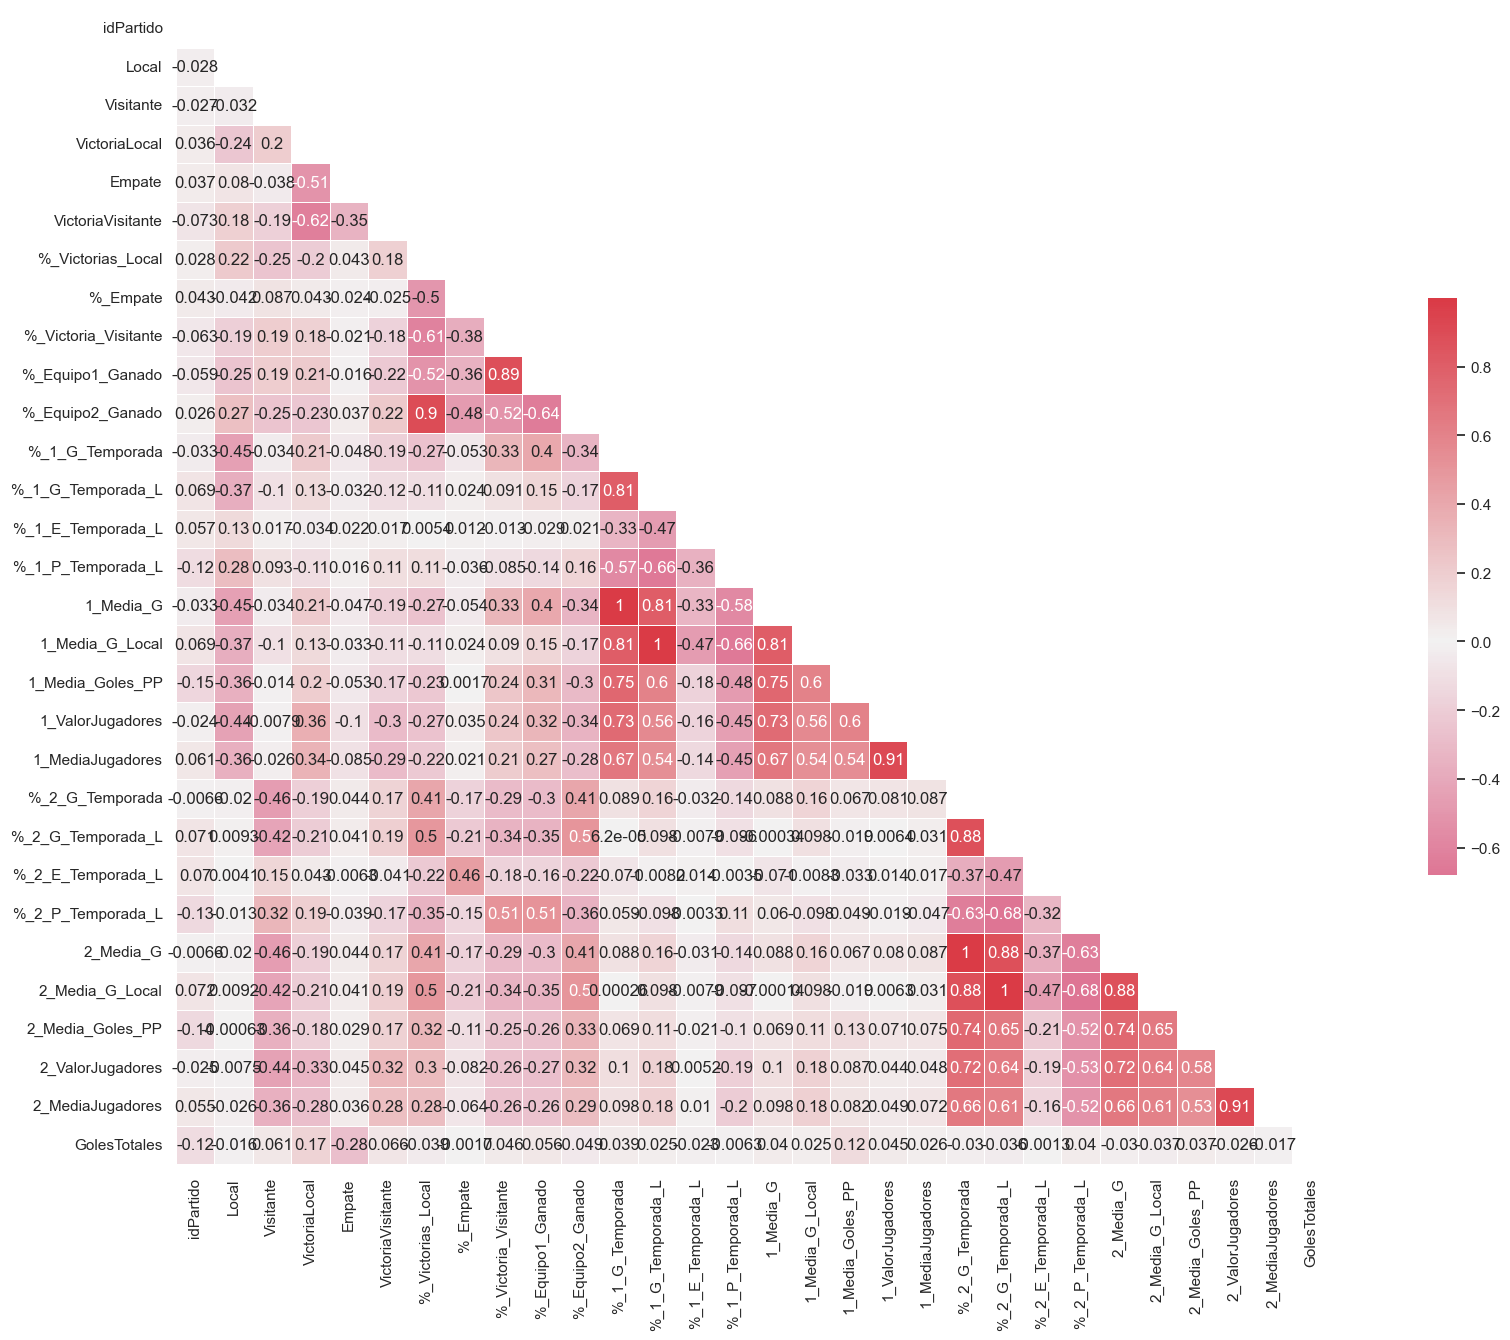

In [223]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 15))
sns.set(style='white')

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(matriz_correlacion,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [224]:
from sklearn.preprocessing import PowerTransformer

# Aplicar transformación de potencia a las características
pt = PowerTransformer()
X_transformed = pt.fit_transform(columnas_numericas)

# Convertir el resultado en un DataFrame con los mismos nombres de columnas
X_transformed_df = pd.DataFrame(X_transformed, columns=columnas_numericas.columns)

# Normalizar las características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed_df)

# Convertir el resultado en un DataFrame con los mismos nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X_transformed_df.columns)

# Visualizar estadísticas de las características transformadas y normalizadas
print(X_scaled_df.describe())

          idPartido         Local     Visitante  VictoriaLocal        Empate  \
count  2.494000e+03  2.494000e+03  2.494000e+03   2.494000e+03  2.494000e+03   
mean  -9.116827e-17 -7.122521e-19 -2.136756e-18   9.401728e-17  1.424504e-17   
std    1.000201e+00  1.000201e+00  1.000201e+00   1.000201e+00  1.000201e+00   
min   -1.987065e+00 -1.935583e+00 -1.939535e+00  -9.522226e-01 -5.368642e-01   
25%   -8.155288e-01 -7.272463e-01 -7.262063e-01  -9.522226e-01 -5.368642e-01   
50%    7.941298e-02  6.744150e-02  6.980573e-02  -9.522226e-01 -5.368642e-01   
75%    8.676776e-01  8.749821e-01  8.770949e-01   1.050175e+00 -5.368642e-01   
max    1.591558e+00  2.194796e+00  2.193020e+00   1.050175e+00  1.862669e+00   

       VictoriaVisitante  %_Victorias_Local      %_Empate  \
count       2.494000e+03       2.494000e+03  2.494000e+03   
mean        8.547026e-18       5.056990e-17  5.413116e-17   
std         1.000201e+00       1.000201e+00  1.000201e+00   
min        -6.557788e-01      -1.36

In [225]:
# Separar características y etiquetas
X = X_scaled_df.drop(columns=['GolesTotales'])  # Características
y = df['GolesTotales']

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 1745 rows
Test Set: 749 rows


In [227]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


Predicted labels:  [3. 3. 3. 3. 3. 3. 1. 3. 2. 3.]
Actual labels   :  720     5
1109    4
2000    4
2394    2
2005    3
195     2
2465    2
1450    2
1091    0
2451    3
Name: GolesTotales, dtype: int64


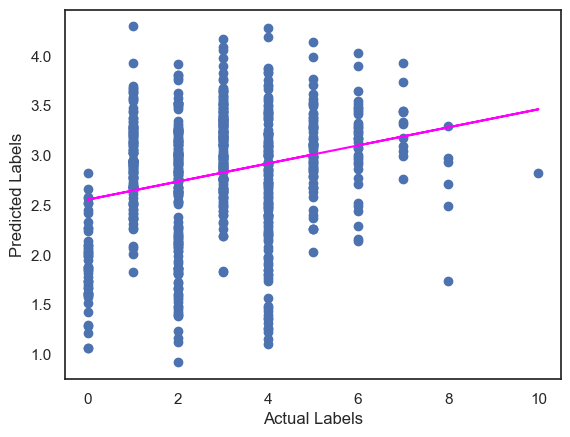

In [228]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Visualizar las primeras 10 predicciones y las etiquetas reales
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ', y_test[:10])

# Visualizar el gráfico de dispersión de las etiquetas reales vs las predicciones
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

# Añadir una línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [229]:
#Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 2.78957744935659
RMSE: 1.6702028168329108
R2: 0.049996637763187635


#### Lasso algorithm

Lasso() 

MSE: 1.6404868948175555
RMSE: 1.2808149338673231
R2: 0.1611982846178619


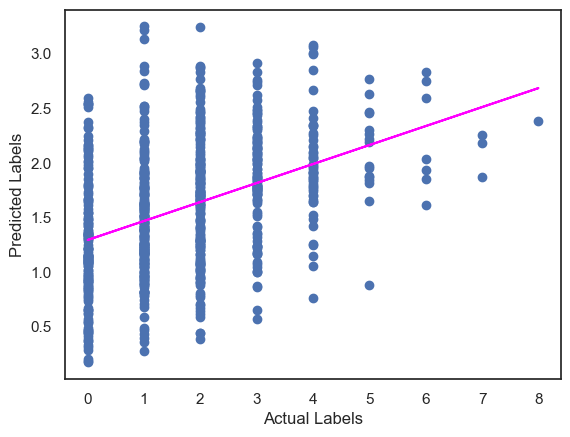

In [196]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

- El modelo de regresión lineal tiene un MSE y RMSE más bajos, lo que indica que tiene un mejor rendimiento en términos de precisión de la predicción en comparación con el modelo Lasso.

- El modelo Lasso tiene un valor de R2 más bajo en comparación con el modelo de regresión lineal, lo que indica que explica menos la variabilidad de los datos observados. Esto podría deberse a la penalización L1 en Lasso, que puede eliminar características menos importantes, lo que conduce a un modelo más simple pero posiblemente menos explicativo.

#### Árboles de decisión

In [197]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_24 <= 414.57
|   |--- feature_15 <= 411.10
|   |   |--- feature_14 <= 1.90
|   |   |   |--- feature_7 <= 30.95
|   |   |   |   |--- feature_0 <= 37.50
|   |   |   |   |   |--- feature_16 <= 19.99
|   |   |   |   |   |   |--- feature_25 <= 14.83
|   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |--- feature_25 >  14.83
|   |   |   |   |   |   |   |--- feature_15 <= 399.55
|   |   |   |   |   |   |   |   |--- feature_15 <= 396.37
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 21.43
|   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |   |--- feature_3 >  21.43
|   |   |   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |   |   |--- feature_15 >  396.37
|   |   |   |   |   |   |   |   |   |--- feature_25 <= 18.43
|   |   |   |   |   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |   |   |   |   |--- feature_25 >  18.43
|   |   |   |   |   |   |   |  

 Cada nodo evalúa una característica del conjunto de datos y, dependiendo del valor de esa característica, el árbol sigue una rama específica hasta llegar a un nodo final donde se hace una predicción sobre el número de goles. Ahora voy a evaluar este modelo.

MSE: 3.5941255006675568
RMSE: 1.8958178975491176
R2: -0.8377218646381903


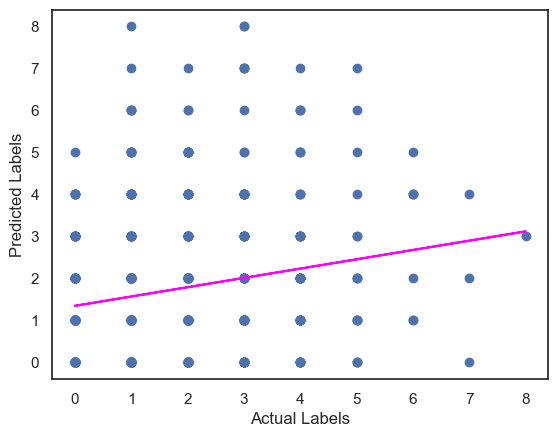

In [198]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfica predecida vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

#linea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, tiene un margen de mejora especialmente en términos de reducir el error y mejorar la capacidad del modelo para explicar la variabilidad en los datos de destino ya que en estos momentos es de un 32%.

### Ensemble Algorithm

En lugar de depender de un solo modelo,  los algoritmos de conjunto utilizan la idea de que la combinación de múltiples modelos puede producir predicciones más precisas y robustas que cualquier modelo individual. Voy a entrenar un modelo de regresión utilizando el algoritmo Random Forest Regressor y Gradient Boosting.

RandomForestRegressor() 

MSE: 1.61469652870494
RMSE: 1.2707070979202642
R2: 0.1743852252779402


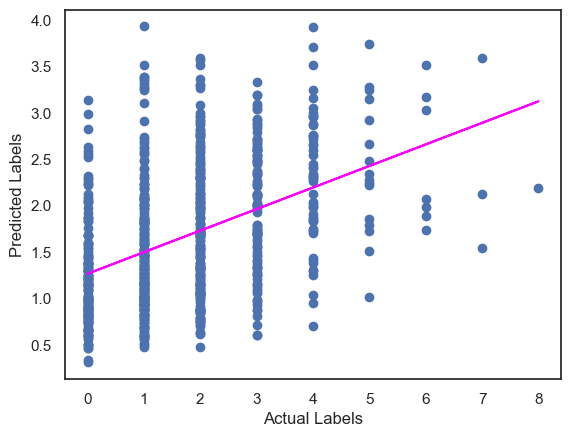

In [199]:
from sklearn.ensemble import RandomForestRegressor

#Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [200]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model)

GradientBoostingRegressor()


MSE: 1.621202286595479
RMSE: 1.273264421318478
R2: 0.17105874891553563


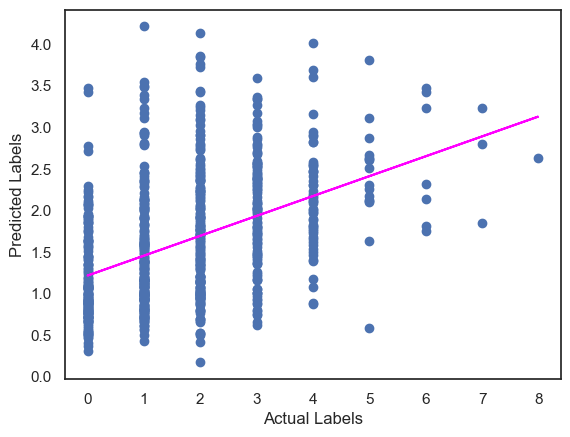

In [201]:
#Evaluación del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfica predecida vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo de ensemble (Gradient Boosting en este caso) muestra el mejor rendimiento en términos de MSE, RMSE y R2 en comparación con los otros modelos.

El modelo Lasso parece tener el peor rendimiento, lo que indica que no explica tan bien la variabilidad de los datos.

El árbol de decisión tiene un rendimiento similar al Lasso, aunque ligeramente mejor, pero aún así es superado por la regresión lineal y el ensemble algorithm en términos de métricas de evaluación.

El ensemble algorithm muestra un rendimiento bastante bueno, con el MSE más bajo y un R2 alto en comparación con los otros modelos, lo que sugiere que puede ser una opción sólida para hacer predicciones precisas.

#### Optimización con hiperparámetros para GradientBosoting

A continuación vamos a probar la técnica de ajuste de hiperparámetros buscando la mejor combinación de estos para el estimador GradientBoostingRegressor utilizando la métrica de puntuación R2 a través de la técnica de búsqueda en cuadrícula.

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Agregamos el modelo a una variable
alg = GradientBoostingRegressor()

#El diccionario params especifica una cuadrícula de combinaciones de hiperparámetros que se probarán durante la búsqueda en cuadrícula para encontrar la mejor combinación
#learning_rate contribución de cada árbol en el conjunto, n_estimators número de árboles de decisión que se utilizarán en el ensamble
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

#Utilizaremos GridSearchCV para realizar una búsqueda exhaustiva sobre una cuadrícula de valores de hiperparámetros, con el objetivo de encontrar la combinación de hiperparámetros que maximice una métrica de evaluación específica. En este caso, la métrica de evaluación utilizada es el coeficiente de determinación R2.
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Mejor combinacion de parametros:", gridsearch.best_params_)

Mejor combinacion de parametros: {'learning_rate': 0.1, 'n_estimators': 50}


In [203]:
#Mejor modelo encontrado en la búsqueda
model=gridsearch.best_estimator_
print(model)

GradientBoostingRegressor(n_estimators=50)


In [204]:
#Evaluación del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 1.6021602806508228
RMSE: 1.265764701929558
R2: 0.18079516759778957


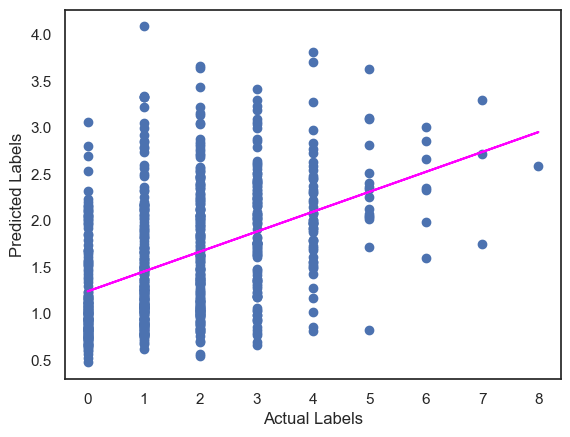

In [205]:
#Gráfica predicha vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

En este caso la evaluación no mejora significativamente.

## Preprocesamiento de datos

A continuación, vamos a entrenar un modelo de regresión utilizando un pipeline con los modelos random forest y gradient boosting, ya que son los mejores modelos que nos han salido, en el que se aplican diferentes transformaciones a las características de los datos antes de ajustar el modelo:

- Escalado de características numéricas: Normalizar características numéricas para que estén en la misma escala. Esto evita que las características con valores grandes produzcan coeficientes que afecten desproporcionadamente las predicciones del modelo.

- Codificación de variables categóricas: Convertir características categóricas en representaciones numéricas. Esto se realiza porque la mayoría de los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto.

In [206]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Seleccionar las características numéricas a escalar
numeric_features = ['%_Victorias_Local', '%_Empate', '%_Victoria_Visitante', '%_Equipo1_Ganado',
                    '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', 
                    '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', 
                    '1_ValorJugadores', '1_MediaJugadores', '%_2_G_Temporada', '%_2_G_Temporada_L', 
                    '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', 
                    '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']

#Definir el preprocesador como un Pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])


MSE: 1.624772214662277
RMSE: 1.2746655305068373
R2: 0.1692333995051375


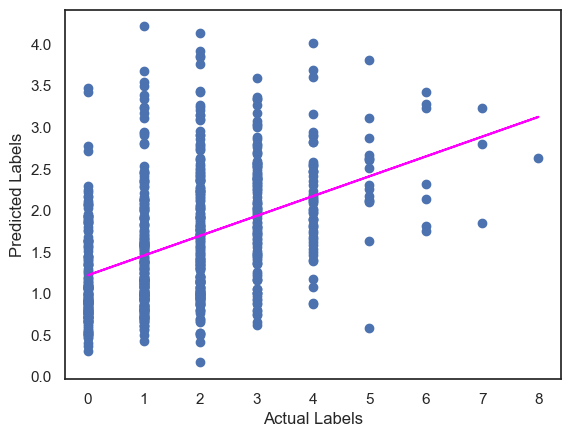

In [207]:
# Crear un Pipeline completo con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Entrenar el Pipeline
model = pipeline.fit(X_train, y_train)

# Hacer predicciones
predictions = pipeline.predict(X_test)

#Evaluación
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

#Gráfico predicho vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())]) 

MSE: 1.6148082777036046
RMSE: 1.2707510683464345
R2: 0.17432808660035104


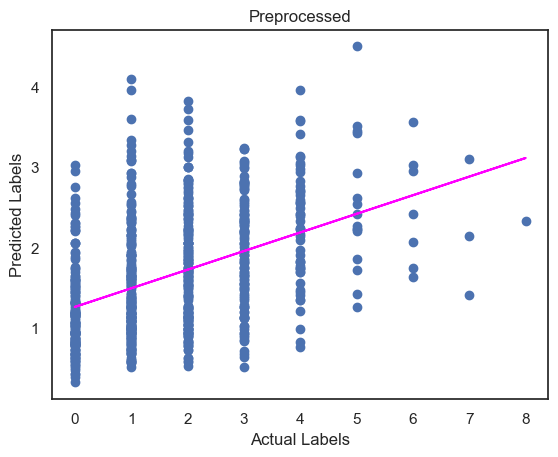

In [208]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

En mi caso normalizar los datos no afecta a mi modelo boost gradient, pero si mejora el modelo de random forest. Evaluando todos los modelos podemos ver que los mejores valores valores lo tiene el modelo gradient boosting ajustado con hiperparametros, en concreto con 50 estimadores. 

Voy a hacer una última prueba normalizando los datos mediante el logaritmo para ver si mejoraría los modelos, ya que algunos valores estén sesgados o tengan valores atípicos.

La estandarización de las características mediante el pipeline que hemos hecho anteriormente implica transformarlas de modo que tengan una media de cero y una desviación estándar de uno. Esto se logra restando la media de cada característica y dividiendo por su desviación estándar. Por otro lado, la transformación logarítmica, como np.log1p, se utiliza para modificar la distribución de las características, especialmente si están sesgadas o si varían en órdenes de magnitud. 

In [209]:
from sklearn.preprocessing import PowerTransformer

#Normalizamos los datos de entrenamiento y los guardamos en un fichero para su uso futuro
pt = PowerTransformer()
pt.fit(X_train)
#with open('/Users/carlotasanchezgonzalez/Desktop/regresion1 copia/scalers/octavos_scaler.pkl', 'wb') as f:
    #pickle.dump(pt, f)

#Normalizamos los datos para que se asemeje a una distribución normal y así mejorar el rendimiento del modelo
x_train_scaled = pt.transform(X_train)
x_test_scaled = pt.transform(X_test)

y_train_scaled = np.log1p(y_train)

#Y lo guardamos en dataframes
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)

x_train_scaled


,Local,Visitante,GolesVisitante,%_Victorias_Local,%_Empate,%_Victoria_Visitante,%_Equipo1_Ganado,%_Equipo2_Ganado,%_1_G_Temporada,%_1_G_Temporada_L,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,-0.140093,0.435170,0.136085,0.063611,1.101972,0.801494,-1.028840,0.752548,0.285551,1.341374,...,0.248913,1.123656,1.077158,0.305855,-1.467490,1.215580,1.172759,0.892172,0.748684,0.478305
1,0.491437,1.812269,0.136085,-1.384412,-0.846053,1.286306,1.225258,-1.258938,0.789545,0.193174,...,0.766164,0.863705,-0.387724,-1.285400,1.189138,0.875677,-0.547531,0.330065,-1.079877,-0.581406
2,0.717593,0.074437,1.335141,0.756071,1.011021,-1.006306,0.577035,0.543311,1.210608,0.445870,...,0.730831,1.251757,1.077158,-1.285400,-0.021154,1.363480,1.172759,1.157000,1.149453,0.971890
3,0.187341,-1.638877,-1.228438,0.063611,1.101972,0.801494,0.710766,0.273818,0.285551,0.606605,...,-0.475961,0.278375,0.685915,-1.285400,0.420537,0.172457,0.678378,-0.031562,1.244812,1.239134
4,-0.597650,1.959401,-1.228438,1.059475,-0.846053,-1.006306,-1.028840,1.074806,-0.321545,-0.269861,...,0.125216,0.051287,-0.387724,-1.285400,1.189138,-0.054104,-0.547531,-1.342888,-0.721661,-0.664510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1.798029,0.942700,2.388795,1.059475,-0.846053,-1.006306,-1.028840,1.074806,-0.715822,0.193174,...,-0.798603,-1.113486,-0.689571,1.105960,0.160347,-1.165416,-0.820736,-0.382243,-0.054712,0.286697
1741,-1.431854,-0.805397,0.136085,0.543057,0.935924,0.570890,0.985780,-0.026378,0.572255,0.193174,...,1.544176,1.547103,0.483494,0.305855,-0.021154,1.764300,0.417838,1.182950,0.791002,0.047242
1742,0.041424,0.276536,0.136085,0.641371,-0.846053,0.801494,1.035196,0.273818,0.750427,0.912592,...,1.208385,-0.443352,-0.689571,1.105960,0.160347,-0.538226,-0.820736,-0.141011,0.124249,-0.657669
1743,0.430247,0.840178,-1.228438,1.059475,-0.846053,-1.006306,-1.028840,1.074806,0.167953,0.193174,...,-0.936315,0.750756,0.932307,-1.285400,0.160347,0.732261,0.981024,-0.141011,-0.018159,-0.074869


GradientBoostingRegressor() 

MSE: 1.6219732403772997
RMSE: 1.2735671322617037
R2: 0.17066455048779172


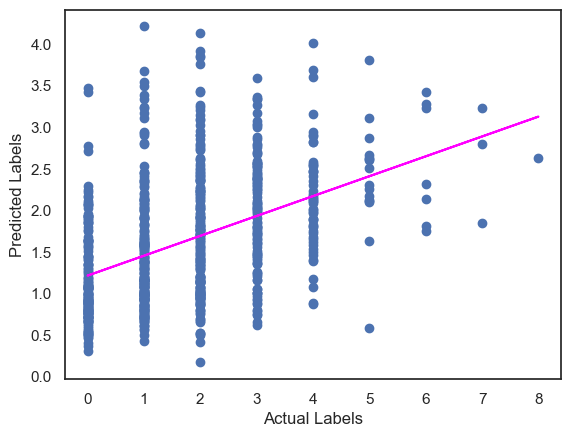

In [210]:
#Entrenamos el modelo con los datos normalizados
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, "\n")
#Evaluación del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

#Gráfica predicha vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 1.5931125500667558
RMSE: 1.2621856242513443
R2: 0.18542138677589215


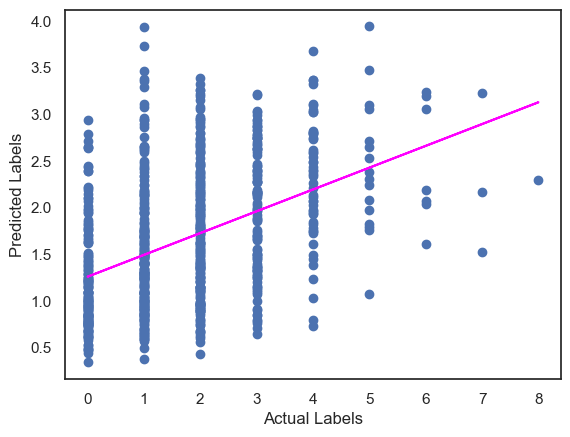

In [211]:
#Entrenamos el modelo con los datos normalizados
model = RandomForestRegressor().fit(X_train, y_train)
print(model, "\n")
#Evaluación del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


#Gráfica predicha vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Estandarizando mediante algoritmo podemos ver que para el algoritmo de random forest no afecta notablemente en comparacion con pipeline. Pero para gradient boosting los errores si nos mejoran un poco, por tanto vamos a guardar este modelo y será el que utilizaremos para predecir neustros valores.